In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
df_ret=pd.read_excel('RFM.xlsx')

In [ ]:
print('{:,} rows; {:,} columns'
      .format(df_ret.shape[0], df_ret.shape[1]))

In [ ]:
df_ret.head()

In [ ]:
snapshot_date = df_ret['Inv_Date'].max() + timedelta(days=1)
print(snapshot_date)

In [ ]:
 df_ret['Inv_Date1']= df_ret['Inv_Date']

In [ ]:
data_process = df_ret.groupby(['Customer_ID']).agg({
        'Inv_Date': lambda x: (snapshot_date - x.max()).days,
        'Inv_Date1':'count',
        'total_order': 'sum'})

In [ ]:
data_process.rename(columns={'Inv_Date': 'Recency',
                         'Inv_Date1': 'Frequency',
                         'total_order': 'MonetaryValue'}, inplace=True)

In [ ]:
data_process

NameError: name 'sns' is not defined

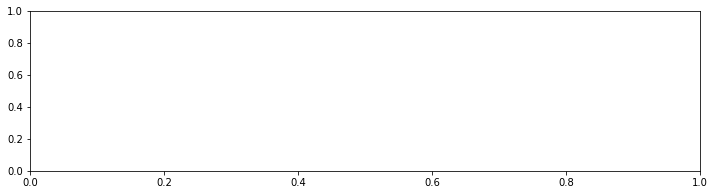

In [51]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()